## Breaking it Down: Principal Component Analysis
**Outline:**
1. [What is principal component analysis?](#1-what-is-principal-component-analysis)
2. [Getting started with our example dataset](#2-getting-started)
3. [Implementing PCA in a 4-step process](#3-implementing-pca-in-a-4-step-process)
    1. [Standardize the data](#31-data-standardization)
    2. [Find the covariance matrix of the dataset](#32-find-the-covariance-matrix-of-the-dataset)
    3. [Find, rank, and select the eigenvalues and eigenvectors of the covariance matrix](#33-find-the-eigenvalues-and-eigenvectors-of-the-covariance-matrix)
    4. [Project the data along the selected feature vectors](#34-project-the-data-along-the-selected-feature-vectors)
4. [Implementing PCA on an even higher-dimensional data](#4-implementing-pca-on-a-higher-dimensional-dataset)
5. [Using PCA in the real-world with scikit-learn](#5-using-pca-in-the-real-world-with-scikit-learn)


### 1. What is principal component analysis?
Principal component analysis ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis#cite_note-7)) 
is an unsupervised statistical technique that is used to reduce the dimensionality of 
large datasets. This technique was originally developed in [1901 by Karl Pearson](https://ia800708.us.archive.org/view_archive.php?archive=/22/items/crossref-pre-1909-scholarly-works/10.1080%252F14786440108636578.zip&file=10.1080%252F14786440109462720.pdf). Below are some questions that I originally had when learning about this technique.

1. **Q:** What do we mean by dimensions? 

    **A:** By dimensions, we simply mean variables. 

2. **Q**: Why would we want to reduce the dimensions of a dataset?

    **A:** Dimension reduction improves our ability to visualize a high-dimensional datasets, improves analytical efficiency, and enables key variable detection from large-scale and high-dimensional datasets. PCA reduces the number of variables from a dataset while preserving as much of the original information as possible.
 

### 2. Getting Started
To start, we'll import our necessary packages and we'll load the first demo dataset, the **[Iris Dataset][iris]** from scikit-learn.

Let's peak into the data to see how they're structured.

[iris]: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



The Iris Dataset is a great way to introduce PCA. It contains data from three different species of Iris flowers: Setosa, Versicolour, and Virginica.  

Four variables were examined for each flower: sepal length, sepal width, petal length, and petal width.

Below can visualize the relationship between these varaibles<sup>[1][wiki]</sup>, and we can see that they already produce easily recognizable clusters when examining two features at a time.

<img src="./images/iris_scatterplot.png" alt="iris feature scatterplot/" width="50%">

So if the data already cluster well, why should we reduce their dimensionality with PCA?

Because the dataset high-dimensional (4 variables), applying a PCA would improve our ability to 1. visualize and 2. analyze the datasets. 

1. Reducing the dimensionality of the dataset will allow us to visualize and examine the clustering relationships among the data in lower dimensions with newly constructed features from the input features. To demonstrate this utility, we will visualize the how reducing the dimensions of the dataset can let us produce visualizations with two, and even only one, principal component.

2. Reducing dimensionality will decrease the size of the dataset, and because PCA reduces dimensionality while minimizing information loss, these lower-dimensional data could be used for more efficient computational analysis (e.g., training a logistic classifier to recognize flower species).

Ok - with the prelude done, let's apply the PCA to our Iris dataset.

[wiki]: https://en.wikipedia.org/wiki/Principal_component_analysis

### 3. Implementing PCA in a 4-Step Process
PCA can be implemented in a 4-step approach (here I'm merging three guides<sup>[2][Zakaria Jaadi],[3][James McCaffrey],[4][scott]</sup>).

#### 3.1 Data Standardization
Before conducting a PCA on your dataset, it must be standardized in some way. 

This is because PCA aims to identify the components of the dataset that maximize variance. If the individual dimensions of the dataset don't have standardized variances, PCA will inappropriately allocate the components to the data with higher variances.

[This post][sklearn] from scikit-learn explains it well. In essence:
> Imagine a dataset with two features, weight (k) and height (h). We are examining these features to understand how they correlate with how high an individual can jump.
> Without normalization, weight will have much more variance than height. If we don't normalize the datasets, the PCA will inappropriately determine that the direction of maximal variance is more closely aligned with weight than height and will minimze the contribution of the height values to the components.

As such, let's standardize our dataset with the equation below so that the mean is 0 and the standard deviation is 1. In the equation , $x$ is the value to be standardized, $\mu$ is the feature mean, and $\sigma$ is the feature standard deviation.

$x' = \dfrac{x - \mu}{\sigma}$


[sklearn]: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
[Zakaria Jaadi]: https://builtin.com/data-science/step-step-explanation-principal-component-analysis
[James McCaffrey]: https://jamesmccaffrey.wordpress.com/2021/06/28/principal-component-analysis-pca-from-scratch-using-python/
[scott]: https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html#Some-3D-data-to-work-with

In [2]:
def standardize(data):
    """Standardize and return a dataset.
    
    Parameters:
        data : np.ndarray
    
    Returns:
        np.ndarray
    """
    feature_means = np.mean(data, axis=0, keepdims=True)
    feature_stdevs = np.std(data, axis=0, keepdims=True)
    standardized = (data - feature_means) / feature_stdevs
    return standardized

iris_std = standardize(iris.data)
iris_std_df = pd.DataFrame(iris_std, columns=[feat[:-5]+"(std)" for feat in iris.feature_names])
iris_std_df  # examine the standardized data

,sepal length(std),sepal width(std),petal length(std),petal width(std)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


#### 3.2 Find the covariance matrix of the dataset
Next, we need to compute the covariance matrix is an (*n*, *n*) symmetric matrix, where $n = \textit{number of features(dimensions)}$ in the dataset.

Each element of the matrix will contain the covariance between two of the variables.

We'll assign the following variables to the features:

$a = \textit{sepal length(cm)}$<br>
$b = \textit{sepal width (cm)}$<br>
$c = \textit{petal length (cm)}$<br>
$d = \textit{petal width (cm)}$<br>

Normally, to find the variance of a population, we use the equation below:

**Variance:** where $\overline{a}$ is the mean of feature $a$.

$$S^2 = \dfrac{\sum_{i=1}^{n}(a_{i} - \overline{a})^2}{n - 1}$$

To find the *covariance* between two features, we multiply the difference of value and means for each feature rather than squaring the zeroed sample.

**Covariance:** where $\overline{a}$ is the mean of feature $a$, and $\overline{b}$ is the mean of feature $b$.

$$Cov(a, b) = \dfrac{\sum_{i=1}^{n}(a_{i} - \overline{a})(b_{i} - \overline{b})}{n - 1}$$

To create our 4x4 matrix, we factor out the variables and compute the covariance of each pair.

$$\textit{Covariance Matrix} = \begin{bmatrix} 
Cov(a,a) & Cov(a,b) & Cov(a,c) & Cov(a,d) \\
Cov(b,a) & Cov(b,b) & Cov(b,c) & Cov(b,d) \\
Cov(c,a) & Cov(c,b) & Cov(c,c) & Cov(c,d) \\
Cov(d,a) & Cov(d,b) & Cov(d,c) & Cov(d,d) \\
\end{bmatrix}$$

Now let's construct this matrix! Fortunately, the standard numpy has a function built to solve this problem for us.

In [3]:
def construct_cov_matrix(data):
    """Construct and return a covariance marix.
    
    Parameters:
        data : np.ndarray
        
    Returns:
        np.ndarray
    """
    covariance_matrix = np.cov(data.T)  # transpose, numpy wants features in rows
    return covariance_matrix

covariance_matrix = construct_cov_matrix(iris_std)
print(f"Covariance matrix: \n {covariance_matrix}")

Covariance matrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


#### 3.3 Find the eigenvalues and eigenvectors of the covariance matrix
Now, we want to identify the principal components of the covariance matrix. These eigenvectors will be orthogonal and will be oriented in the directions of the greates variance of the dataset.

I'm not going to act like I can explain eigenvalues and eigenvectors better than mathematicians can, but here's a brief overbiew. Eigenvalues are values that, when subtracted from a given matrix that is then multiplied by the identify matrix produces a zero determinant. We can use eigenvalues to identify eigenvectors, which are vectors whose direction remains constant when a linear transformation is applied to them.

- To understand eigenvalues and eigenvectors, watch [3Blue1Brown's video](https://www.youtube.com/watch?v=PFDu9oVAE-g)
- To understand how to identify eignvalues and eigenvectors, watch [this wonderful lesson on Youtube](https://www.youtube.com/watch?v=IdsV0RaC9jM)

Why do we even care about the eigenvalues and eigenvectors? 

The eigenvectors represent the directions of the different degrees of variance in the dataset, and the corresponding eigenvalues represent the contribution of those vectors to the total variance in the dataset. If we sort the eigenvectors based on the weighted contribution of the eigenvectors, we can then identify our $n$ primary components.

Now, let's use numpy to find and sort the eigenvalues and eigenvectors from the

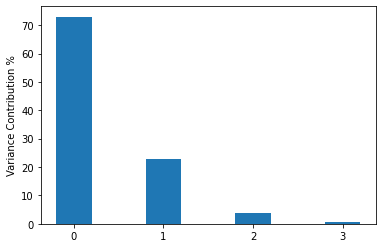

In [4]:
def identify_components(covariance_matrix):
    """Identify the principal components of a covariance matrix.
    
    Parameters:
        covariance_matrix : np.ndarray
        
    Returns
        np.ndarray : sorted_eigenvalues
        
        np.ndarray : sorted_eigenvectors
    """
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    ranks = np.argsort(np.abs(eigenvalues))[::-1]  # descending sort
    sorted_eigenvalues = eigenvalues[ranks]
    sorted_eigenvectors = eigenvectors[:, ranks] # sort along the second axis
    return sorted_eigenvalues, sorted_eigenvectors


eigenvalues, eigenvectors = identify_components(covariance_matrix)
scaled_ranks = eigenvalues / np.sum(eigenvalues) * 100

# Plot the variances
plt.bar(range(scaled_ranks.shape[0]),
        scaled_ranks,
        width=0.4,
        tick_label=range(scaled_ranks.shape[0]))
plt.ylabel("Variance Contribution %")
plt.show()

#### 3.4 Project the data along the selected feature vectors
Finally, we will perform a matrix multiplication to project our original data onto the new grid using our principal components matrix.

First, we're going to project the 4-dimensional data into a 2-dimensional plane with our two main selected principal components. We can do this with a simply matrix multiplication, since our matrix shapes align (n, feature_count) @ (feature_count, components) -> (n, components)

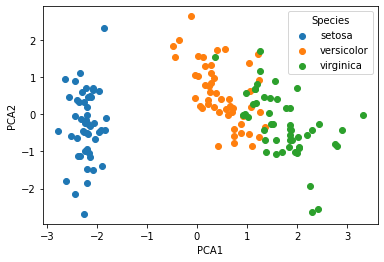

In [5]:
def pca(data, components: int):
    data_std = standardize(data)
    covariance_matrix = construct_cov_matrix(data_std)
    sorted_eigenvalues, sorted_eigenvectors = identify_components(covariance_matrix)
    
    principal_components = sorted_eigenvectors[:, :components]
    
    transformed_data = np.dot(data_std, principal_components)
    return transformed_data
    
transformed_data = pca(iris.data, components=2)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
for i in range(3):
    plt.scatter(transformed_data[iris.target==i, 0],
                transformed_data[iris.target==i, 1],
                label=iris.target_names[i])
plt.legend(loc="upper right", title="Species")

We can now see the utility of PCA! The clusters of the three species are quite distinct with the new feature components. We can even examine the clusters along the first component.

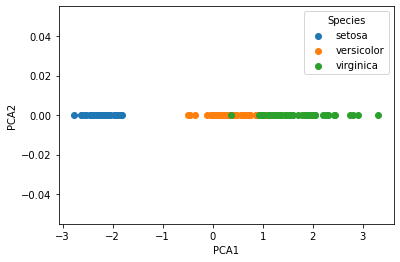

In [6]:
single_component = pca(iris.data, 1)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
zeros = np.zeros(transformed_data.shape[0])
for i in range(3):
    plt.scatter(transformed_data[iris.target==i, 0],
                zeros[iris.target==i],
                label=iris.target_names[i])
plt.legend(loc="upper right", title="Species")

### 4. Implementing PCA on a higher-dimensional dataset
Irises are cool and all, but the iris dataset is relatively low-dimensional. Let's test out PCA with a higher dimensional dataset with more features. For this example, we're going to use the **[Breast Cancer Wisconsin (diagnostic) dataset][bc-data]**. 

This dataset has an $n=569$ and has 30 features about the identified breast tumors, including the tumor size, area, perimeter, and smoothness. Each tumor sample is also labeled with one of two values: *WDBC-Benign* or *WDBC-Malignant*.

Let's load and plot the dataset with two principal components to see if we can identify any obvious clusters between the two classifications.

[bc-data]:https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

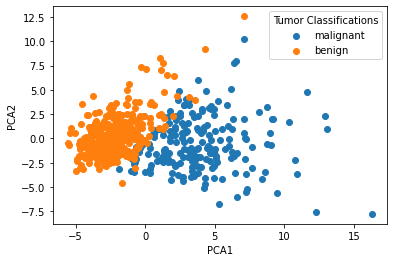

In [7]:
from sklearn.datasets import load_breast_cancer

WDBC = load_breast_cancer()

transformed_data = pca(WDBC.data, components=2)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
for i in range(2):
    plt.scatter(transformed_data[WDBC.target==i, 0],
                transformed_data[WDBC.target==i, 1],
                label=WDBC.target_names[i])
plt.legend(loc="upper right", title="Tumor Classifications")

The clustering separation between the two datasets is astonishing. The dimensionality of the dataset has been reduced from 30 features -> 2 features, and these data could now be easily used to train a logistic classifier.

### 5. Using PCA in the real world with scikit-learn
In real world applications, it's typically not best to use your own functions for widely used methods, such as PCA. This is because there are computer scientists who that have built highly efficient and optimized libraries with functions that will almost always outperform individual implementations. Moreover, using well-established packages prevents the need for bug-squashing and troubleshooting within your own code.

Below, we'll implement data standardization and PCA with scikit-learn on the Breast Cancer Wisconsin (diagnostic) dataset. 

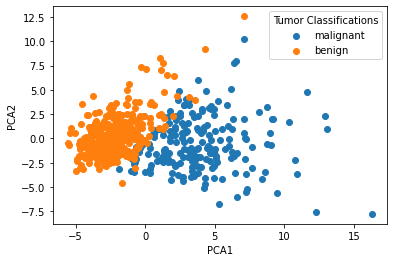

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

WDBC = load_breast_cancer()
components = 2

pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=components))
transformed_data = pca_pipeline.fit_transform(WDBC.data)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
for i in range(2):
    plt.scatter(transformed_data[WDBC.target==i, 0],
                transformed_data[WDBC.target==i, 1],
                label=WDBC.target_names[i])
plt.legend(loc="upper right", title="Tumor Classifications")


Using this approach, we effectively reduced our four PCA functions with several dozens lines of code and documentation into two simple lines.

Feel free to create an issue in the repository if you have an concerns or find any problems with this demonstration.

Thanks for reading!